In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("NetflixEDA").getOrCreate()
df = spark.read.csv("netflix_titles.csv", header=True, inferSchema=True)

In [7]:
# Display Data Overview
print("Data Schema:")
df.printSchema()

Data Schema:
root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = false)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)



In [8]:
print("Sample Records:")
df.show(5)

Sample Records:
+-------+-----+--------------------+--------------------+--------------------+--------------------+--------------+------------+------+--------+--------------------+--------------------+
|show_id| type|               title|            director|                cast|             country|    date_added|release_year|rating|duration|           listed_in|         description|
+-------+-----+--------------------+--------------------+--------------------+--------------------+--------------+------------+------+--------+--------------------+--------------------+
|   s461|Movie|           Surf's Up|Ash Brannon, Chri...|Shia LaBeouf, Jef...|United States, Ca...| July 15, 2021|        2007|    PG|  86 min|Children & Family...|This Oscar-nomina...|
|   s695|Movie|               Aziza|      Soudade Kaadan|Caress Bashar, Ab...|      Lebanon, Syria| June 17, 2021|        2019| TV-PG|  13 min|Comedies, Dramas,...|This short film f...|
|   s883|Movie|Jungle Beat: The ...|         Brent Daw

In [9]:
# Data Cleaning
# Drop Duplicates and Handle Missing Values
df = df.dropDuplicates()
df = df.na.fill({"rating": "Not Rated", "country": "Unknown"})

In [10]:
# Descriptive Statistics
print("Data Summary:")
df.describe()


Data Summary:


DataFrame[summary: string, show_id: string, type: string, title: string, director: string, cast: string, country: string, date_added: string, release_year: string, rating: string, duration: string, listed_in: string, description: string]

In [11]:
df.describe().show()

+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|summary|             show_id|         type|                            title|            director|                cast|         country|     date_added|     release_year|           rating|     duration|           listed_in|         description|
+-------+--------------------+-------------+---------------------------------+--------------------+--------------------+----------------+---------------+-----------------+-----------------+-------------+--------------------+--------------------+
|  count|                8809|         8808|                             8807|                6173|                7983|            8809|           8796|             8807|             8809|         8804|                8806|                8806|
|   mean|       

In [12]:
# Count Content Types
content_type_count = df.groupBy("type").count()
print("Content Type Count:")
content_type_count.show()

Content Type Count:
+-------------+-----+
|         type|count|
+-------------+-----+
|      TV Show| 2676|
|        Movie| 6131|
|         NULL|    1|
|William Wyler|    1|
+-------------+-----+



In [15]:
from pyspark.sql.functions import col, count, when, year
# Count Shows by Release Year
release_year_count = df.groupBy(year("release_year").alias("Year")).count().orderBy("Year")
print("Shows by Release Year:")
release_year_count.show()

Shows by Release Year:
+----+-----+
|Year|count|
+----+-----+
|NULL|   22|
|1925|    1|
|1942|    2|
|1943|    3|
|1944|    2|
|1945|    4|
|1946|    2|
|1947|    1|
|1954|    2|
|1955|    3|
|1956|    2|
|1958|    3|
|1959|    1|
|1960|    4|
|1961|    1|
|1962|    3|
|1963|    2|
|1964|    2|
|1965|    2|
|1966|    1|
+----+-----+
only showing top 20 rows



In [16]:
# Count Top 10 Countries by Content
country_count = df.groupBy("country").count().orderBy(col("count").desc()).limit(10)
print("Top 10 Countries by Content:")
country_count.show()


Top 10 Countries by Content:
+--------------+-----+
|       country|count|
+--------------+-----+
| United States| 2805|
|         India|  972|
|       Unknown|  832|
|United Kingdom|  419|
|         Japan|  245|
|   South Korea|  199|
|        Canada|  181|
|         Spain|  145|
|        France|  123|
|        Mexico|  110|
+--------------+-----+



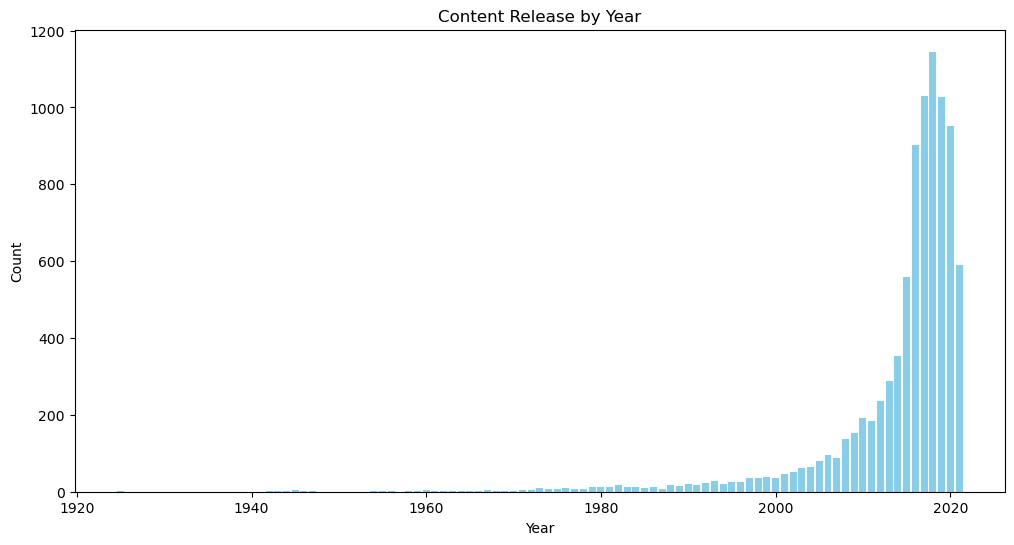

In [18]:
import matplotlib.pyplot as plt
# Visualization
release_year_pd = release_year_count.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(release_year_pd["Year"], release_year_pd["count"], color="skyblue")
plt.title("Content Release by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [19]:
# Top Genres
df.groupBy("listed_in").count().orderBy(col("count").desc()).show(10)

# Top Directors
df.groupBy("director").count().orderBy(col("count").desc()).show(10)

+--------------------+-----+
|           listed_in|count|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
|Comedies, Dramas,...|  273|
|Dramas, Independe...|  252|
|            Kids' TV|  220|
|Children & Family...|  215|
|Children & Family...|  201|
|Documentaries, In...|  186|
|Dramas, Internati...|  180|
+--------------------+-----+
only showing top 10 rows

+--------------------+-----+
|            director|count|
+--------------------+-----+
|                NULL| 2636|
|       Rajiv Chilaka|   19|
|Raúl Campos, Jan ...|   18|
|        Marcus Raboy|   16|
|         Suhas Kadav|   16|
|           Jay Karas|   14|
| Cathy Garcia-Molina|   13|
|     Youssef Chahine|   12|
|     Martin Scorsese|   12|
|         Jay Chapman|   12|
+--------------------+-----+
only showing top 10 rows



In [24]:
from pyspark.sql.functions import to_date

# Convert date_added to date type
df = df.withColumn("date_added", to_date("date_added", "MMMM d, yyyy"))

# Extract Year and Month from date_added
df = df.withColumn("year_added", year("date_added")).withColumn("month_added", month("date_added"))


Content Added by Month:
+-----------+-----+
|month_added|count|
+-----------+-----+
|       NULL|  120|
|          1|  722|
|          2|  557|
|          3|  732|
|          4|  757|
|          5|  625|
|          6|  723|
|          7|  818|
|          8|  746|
|          9|  763|
|         10|  754|
|         11|  696|
|         12|  796|
+-----------+-----+



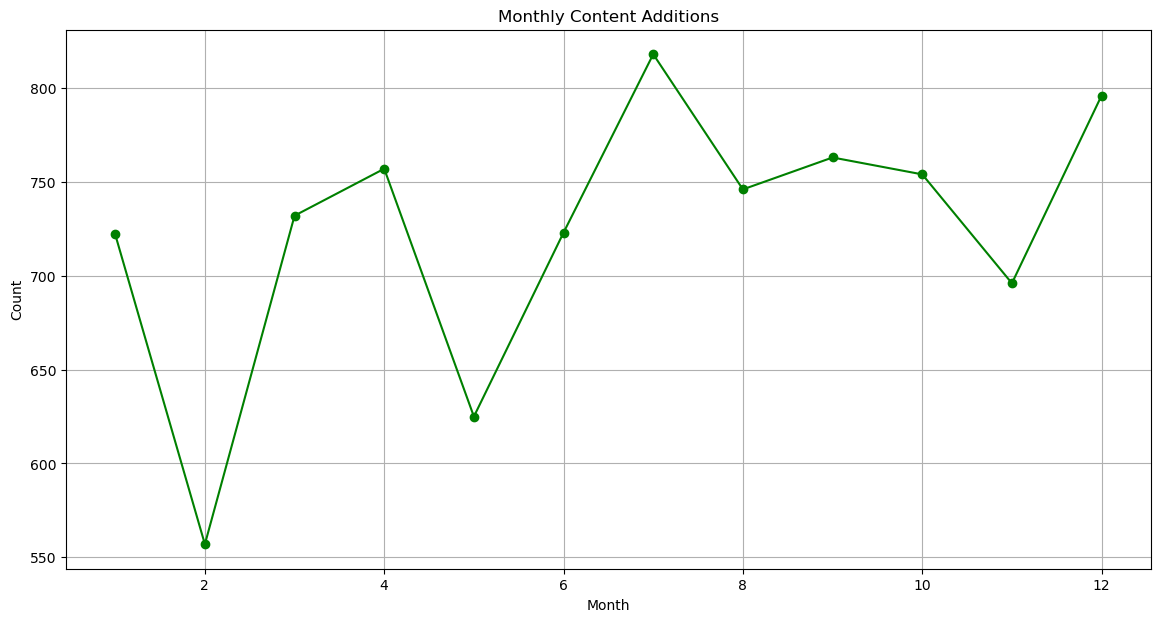

In [25]:
# Content Added by Month
content_by_month = df.groupBy("month_added").count().orderBy("month_added")
print("Content Added by Month:")
content_by_month.show()

# Visualization
content_by_month_pd = content_by_month.toPandas()
plt.figure(figsize=(14, 7))
plt.plot(content_by_month_pd["month_added"], content_by_month_pd["count"], marker='o', color="green")
plt.title("Monthly Content Additions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [26]:
# Close Spark Session
spark.stop()